## Define imports

In [1]:
import requests
import shutil
from bs4 import BeautifulSoup
import json
import pandas as pd

# self created .py file
import ocr

In [2]:
import json
import os
import sys
import requests
import time

# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

## Web Scraping Images

Define images that need to be scraped. Get the page links of each image + metadata

In [4]:
base_url = 'https://transcription.si.edu'

# function to get the links of each page on the home project page
def get_page_links():
    '''
        purpose: this function gets the links of each project on the home project page. 
                 we need this to get the individual images in each project
        returns: 
            - the id of each project
    '''
    projects = []
    
    # iterate through each page
    pagenum = 1
    while True:
        response = requests.get(base_url + '/browse?filter=all&sort=notdone&page=' + str(pagenum))
        soup = BeautifulSoup(response.text)
        links = [link['href'] for link in soup.find_all('a') if 'project' in link['href']]
        links = list(set(links))
        if len(links) > 0:
            projects.extend(links)
            pagenum = pagenum + 1
        else:
            break
            
    # only get the ids
    projects = [project.split('/')[-1] for project in projects]
    return projects

# gets all the images in a project that have not yet been worked on
def get_project_images(project_id):
    '''
        purpose: this function gets the links of the image in the project
        params:
            - project_id: id of the project to retrieve the images for
        returns: 
            - the links of the images that have not been started on yet!
    '''
    pagenum = 0
    all_images = []
    while True:
        response = requests.get('https://transcription.si.edu/assets/' + str(project_id) + '/' + str(pagenum) + '?status=')
        soup = BeautifulSoup(response.text)
        if len(soup.find_all('img')) > 0:
            images = [asset.find('img')['src'] for asset in soup.find_all('div', class_ = 'asset') if 'Start' in asset.text]
            all_images.extend(images)
            pagenum = pagenum + 1
        else:
            break
    all_images = [img.replace('max_w=210', 'max_w=2000') for img in all_images]
    return all_images

In [5]:
projects = get_page_links()

In [6]:
# save the information into a dictionary
project_dict = {}

# iterate thru every project - this could use multiprocessing.. can be slow
for project in projects:
    
    # how is it going?
    print(project)
    
    # call the function
    images = get_project_images(project)
    
    # save to dict only if there are images that haven't been started on yet
    if len(images) > 0:
        project_dict[project] = images

26762
26753
29922
30419
26771
29769
18046
28698
30362
29946
30422
18113
28704
30425
29256
26774
29259
30359
18043
29934
30323


In [122]:
# save as json if necessary... since the process takes some time to run

# with open('data.json', 'w') as fp:
#     json.dump(project_dict, fp)

# with open('data.json', 'r') as fp:
#     data = json.load(fp)

## Hit the Azure Endpoint to get OCR Text

Use our custom defined function to get the text of the image. This works well, but we get back a json of bounding boxes & lines. doesn't give us larger bounding boxes (ie. news paper paragraph?)

In [207]:
image_url = 'https://ids.si.edu/ids/deliveryService?max_w=2000&id=NMAAHC-007675839_00116'

web hosted image


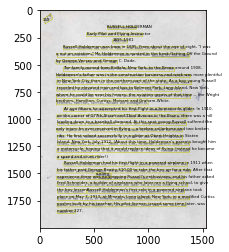

<Figure size 432x288 with 0 Axes>

In [208]:
json_response = ocr.get_text(image_url, '26771')

In [209]:
analysis = json.loads(json_response)

## Use pytesseract to get hOCR output

Use pytesseract instead of Azure because we aren't limited in calls & don't have to convert to hOCR ourselves.

Change the output to hOCR to visualize on our front-end

In [19]:
import pytesseract
from pytesseract import image_to_pdf_or_hocr
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [20]:
hocr_output = image_to_pdf_or_hocr('testing3.jpg', extension='hocr')
hocr = hocr_output.decode('utf-8')

TesseractError: (1, 'Tesseract Open Source OCR Engine v5.0.0-alpha.20200328 with Leptonica Error, cannot read input file C:\\Users\\Lily\\Documents\\smithsonian-ocr\\exploration\\testing3.jpg: No such file or directory Error during processing.')

In [226]:
# this is the xml that needs to be passed to the front-end 
BeautifulSoup(hocr, parser='xml')

<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title></title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="tesseract v5.0.0-alpha.20200328" name="ocr-system"/>
<meta content="ocr_page ocr_carea ocr_par ocr_line ocrx_word ocrp_wconf" name="ocr-capabilities"/>
</head>
<body>
<div class="ocr_page" id="page_1" title='image "C:\Users\Lily\Documents\ocr-bac-volunteering\testing3.jpg"; bbox 0 0 2000 1576; ppageno 0'>
<div class="ocr_carea" id="block_1_1" title="bbox 178 10 1075 82">
<p class="ocr_par" id="par_1_1" lang="eng" title="bbox 178 10 1075 82">
<span class="ocr_caption" id="line_1_1" title="bbox 178 10 1075 82; baseline -0.001 -2; x_size 91.599998; x_descenders 22.9; x_ascenders 22.9">
<span class="ocrx_word" id="word_1_1" title="bbox 178 14 283 81; x_wconf 93"